In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [ ]:
# load data
df = pd.read_csv('../../data/H2.csv')

##### Let's ask some general descriptive questions first.

1. What is the most frequently booked month/week?

Most frequently booked month: August, Total Reservation: 8983
Most frequently booked month: 33. Total Reservation: 2383


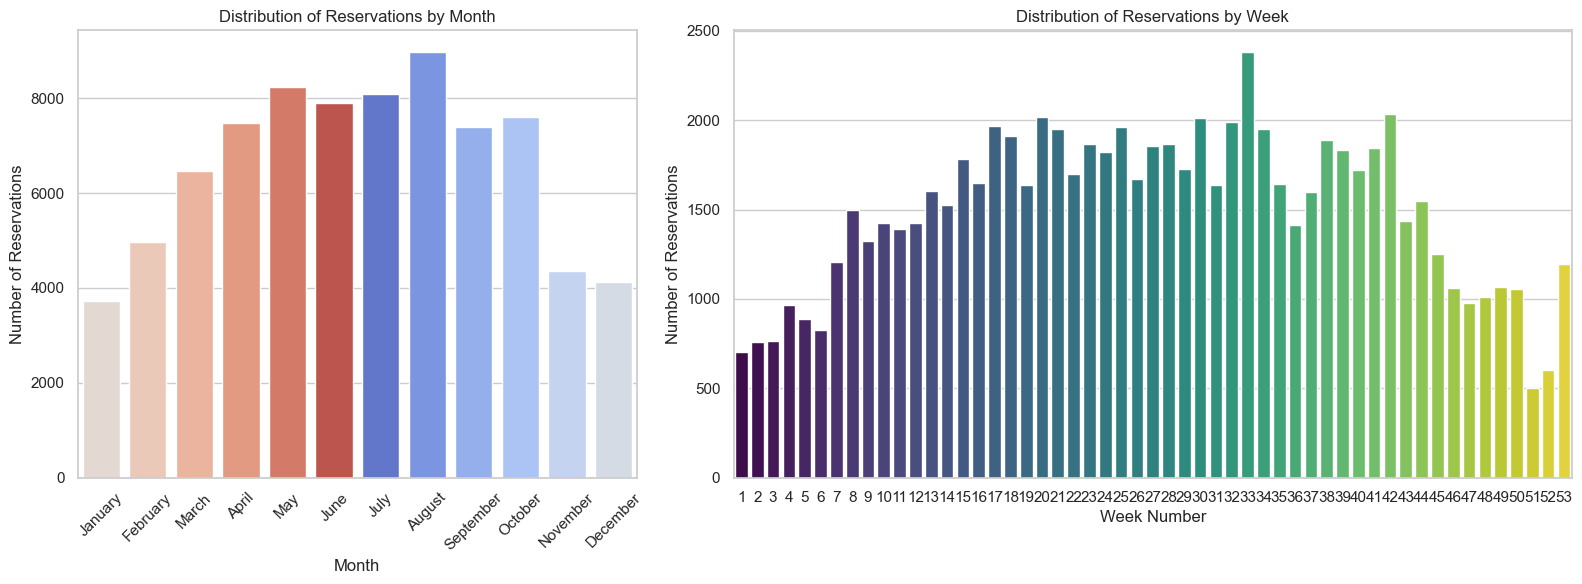

In [58]:
# Find the most frequently booked month
most_common_month = df['ArrivalDateMonth'].value_counts().idxmax()
most_common_month_count = df['ArrivalDateMonth'].value_counts().max()

print(f"Most frequently booked month: {most_common_month}, Total Reservation: {most_common_month_count}")

# Find the most frequently booked weeek
most_common_week = df['ArrivalDateWeekNumber'].value_counts().idxmax()
most_common_week_count = df['ArrivalDateWeekNumber'].value_counts().max()

print(f"Most frequently booked month: {most_common_week}. Total Reservation: {most_common_week_count}")

# Create a subplot figure
fig, axes = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={'width_ratios': [2, 3]})

# Distribution by month
sns.countplot(
    data=df, 
    x='ArrivalDateMonth', hue='ArrivalDateMonth',
    order=['January', 'February', 'March', 'April', 'May', 'June', 
           'July', 'August', 'September', 'October', 'November', 'December'],
    ax=axes[0], 
    palette='coolwarm', legend=False
)
axes[0].set_title("Distribution of Reservations by Month")
axes[0].set_xlabel("Month")
axes[0].set_ylabel("Number of Reservations")
axes[0].tick_params(axis='x', rotation=45)

# Distribution by week
sns.countplot(data=df, x='ArrivalDateWeekNumber', hue='ArrivalDateWeekNumber',
              ax=axes[1], palette='viridis', legend=False)
axes[1].set_title("Distribution of Reservations by Week")
axes[1].set_xlabel("Week Number")
axes[1].set_ylabel("Number of Reservations")

# Adjust layout
plt.tight_layout()
plt.show()

**Observation**<br>
- Although the data we examined is a city hotel, the highest number of reservations were made in August and density in warm or hot weather.

2. What is the average cost of a room per day and what is the ADR distribution?

Minimum ADR: 0.0.
Maximum ADR: 5400.0.


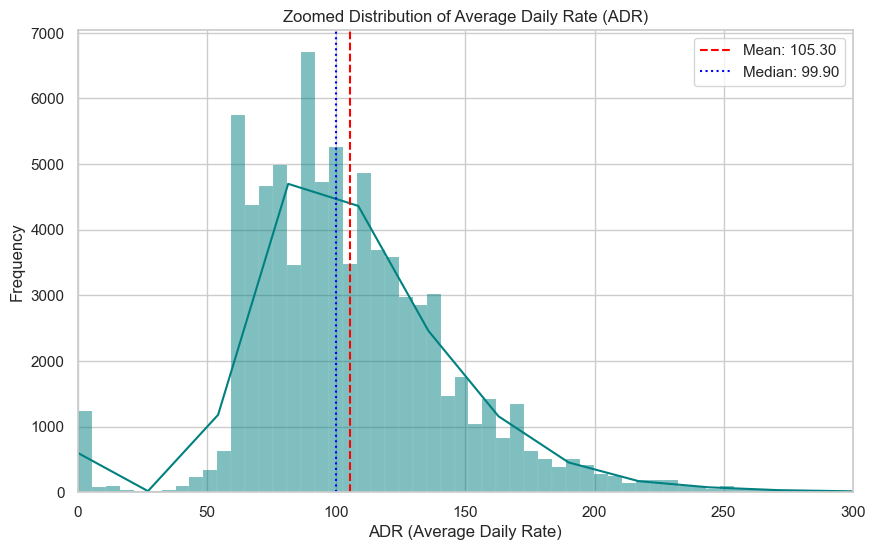

In [60]:
# Calculate ADR statistics
adr_min = df['ADR'].min()
adr_max = df['ADR'].max()
adr_mean = df['ADR'].mean()
adr_median = df['ADR'].median()

print(f"Minimum ADR: {adr_min}.")
print(f"Maximum ADR: {adr_max}.")

# Zoom into the dense part of the ADR distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['ADR'], bins=1000, kde=True, color='teal')
plt.xlim(0, 300)  # Adjust the x-axis limit to zoom into the dense part

plt.axvline(adr_mean, color='red', linestyle='--', label=f'Mean: {adr_mean:.2f}')
plt.axvline(adr_median, color='blue', linestyle=':', label=f'Median: {adr_median:.2f}')

plt.title("Zoomed Distribution of Average Daily Rate (ADR)")
plt.xlabel("ADR (Average Daily Rate)")
plt.ylabel("Frequency")
plt.legend()
plt.show()

**Observation**<br>
- The average price is 105.30 and the density is below this band, the decreasing curve is visible.
- While there are those staying at crazy prices such as 5400.00, it is also noticeable that there are many staying for free.
    - Although it is possible to stay at a hotel for free (the hotel gave it as compensation or a gift, etc.) we should remove it as it will reduce the accuracy of our machine learning model.

3. How are customers distributed according to age groups and customer types?

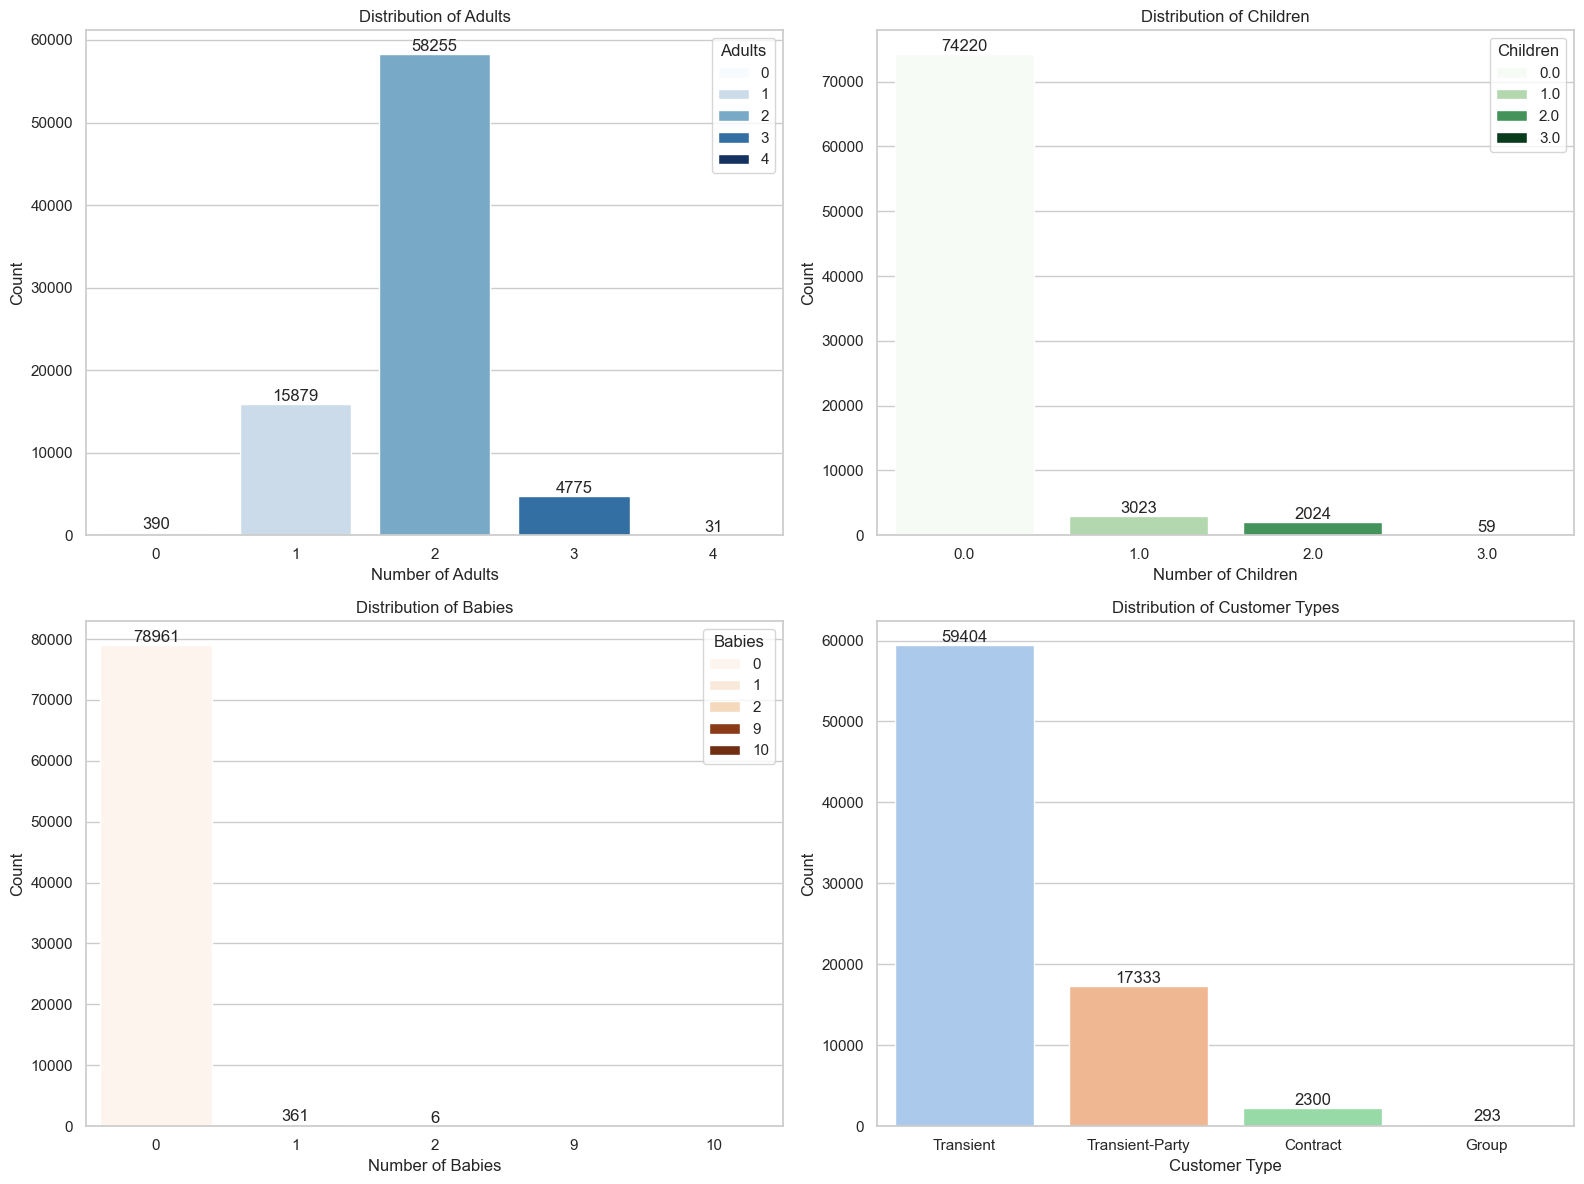

In [90]:


# Set visualization style
sns.set_theme(style="whitegrid")

# Create subplots for demographic features
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Adults distribution
sns.countplot(data=df, x='Adults', hue='Adults', ax=axes[0, 0], palette='Blues', dodge=False)
axes[0, 0].set_title("Distribution of Adults")
axes[0, 0].set_xlabel("Number of Adults")
axes[0, 0].set_ylabel("Count")
for i, count in df['Adults'].value_counts().items():
    axes[0, 0].text(i, count, f'{count}', ha='center', va='bottom')

# Children distribution
sns.countplot(data=df, x='Children', hue='Children', ax=axes[0, 1], palette='Greens', dodge=False)
axes[0, 1].set_title("Distribution of Children")
axes[0, 1].set_xlabel("Number of Children")
axes[0, 1].set_ylabel("Count")
for i, count in df['Children'].value_counts().items():
    axes[0, 1].text(i, count, f'{count}', ha='center', va='bottom')

# Babies distribution
sns.countplot(data=df, x='Babies', hue='Babies', ax=axes[1, 0], palette='Oranges', dodge=False)
axes[1, 0].set_title("Distribution of Babies")
axes[1, 0].set_xlabel("Number of Babies")
axes[1, 0].set_ylabel("Count")
for i, count in df['Babies'].value_counts().items():
    if count == 1:
        continue
    else:
        axes[1, 0].text(i, count, f'{count}', ha='center', va='bottom')
    
# Customer type distribution
sns.countplot(data=df, x='CustomerType', hue='CustomerType', palette='pastel', ax=axes[1, 1], legend=False)
axes[1, 1].set_title("Distribution of Customer Types")
axes[1, 1].set_xlabel("Customer Type")
axes[1, 1].set_ylabel("Count")
for i, count in df['CustomerType'].value_counts().items():
    axes[1, 1].text(i, count, f'{count}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

**Observation**<br>
*Adults:*
- Most reservations are for 1-2 adults.
- Reservations for more adults are quite rare.

*Children:*
- Most reservations do not include any children.
- Reservations that include children are usually limited to 1 or 2 children.

*Babies:*
- Reservations that include infants are rare.
- The most common number of infants is 1.
- There is one family with 9 babies and 1 family with 10 babies

*CustomerTypes:*
- ***"Transient"*** customers make up the vast majority.
- ***"Transient-Party"*** and ***"Group"*** customers are a smaller, but distinct group.